## **1. Install Required Libraries**

In [6]:
pip install networkx dowhy matplotlib pandas numpy

## **2. Visualizing a DAG with networkx**

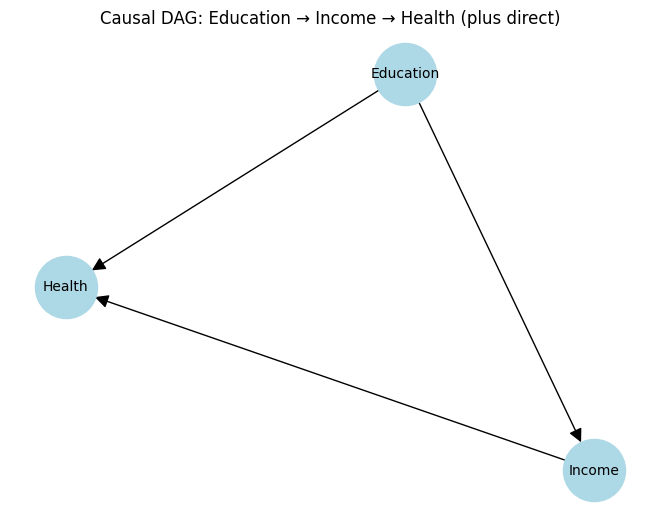

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the causal graph structure
edges = [
    ('Education', 'Income'),
    ('Income', 'Health'),
    ('Education', 'Health')  # Let's assume there's also a direct effect
]

# Create the graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrowsize=20)
plt.title("Causal DAG: Education → Income → Health (plus direct)")
plt.show()

## **3. Simulating Data Based on the DAG**

In [8]:
import pandas as pd
import numpy as np

np.random.seed(0)

# Simulate exogenous noise terms
n = 1000
U_education = np.random.normal(0, 1, size=n)
U_income = np.random.normal(0, 1, size=n)
U_health = np.random.normal(0, 1, size=n)

# Generate variables based on assumed structural equations
education = U_education
income = 0.7 * education + U_income
health = 0.5 * income + 0.3 * education + U_health

# Create DataFrame
data = pd.DataFrame({
    'Education': education,
    'Income': income,
    'Health': health
})


## **4. Defining and Visualizing the Causal Model with DoWhy**

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


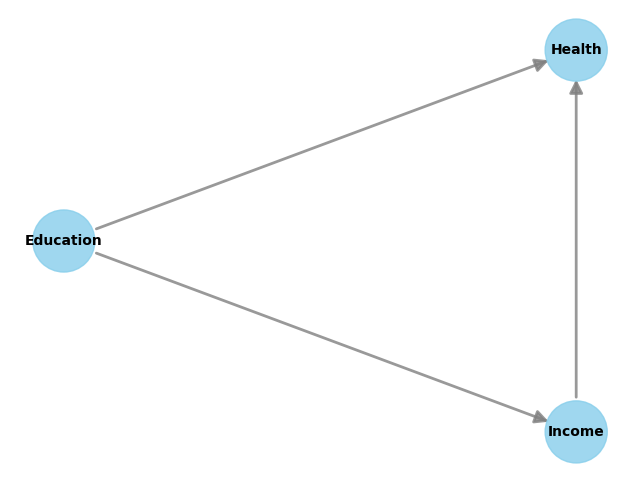

In [9]:
from dowhy import CausalModel

# Define the model
model = CausalModel(
    data=data,
    treatment="Education",
    outcome="Health",
    graph="""
    digraph {
        Education -> Income;
        Income -> Health;
        Education -> Health;
    }
    """
)

# Visualize the model (saved as a PNG file by default)
model.view_model()


## **5. Identifying the Causal Effect**

In [10]:
# Identify the estimand (i.e., the causal quantity we want to estimate)
identified_estimand = model.identify_effect()
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                 
────────────(E[Health])
d[Education]           
Estimand assumption 1, Unconfoundedness: If U→{Education} and U→Health then P(Health|Education,,U) = P(Health|Education,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## **6. Estimating the Causal Effect**

In [11]:
# Estimate the causal effect using linear regression
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("Causal Effect Estimate:", causal_estimate.value)


Causal Effect Estimate: 0.5981181992317988


/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


## **7. Refuting the Estimate**

In [12]:
# Refutation by adding a random (placebo) treatment
refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter"
)

print(refutation)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Refute: Use a Placebo Treatment
Estimated effect:0.5981181992317988
New effect:0.0
p value:1.0



/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF